In [1]:
import cv2
import os
import skimage
from skimage import data
from skimage import transform
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint
import tensorflow as tf
from scipy import ndimage, misc
from skimage.transform import rotate


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
HEIGHT=28
WIDTH=28
Number_Of_Classes = 10
#载入数据集
mnist = input_data.read_data_sets('MNIST_data',one_hot = True)#当前路径，‘’可以选择存放路径

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) if f.endswith(".jpg")]
        for f in file_names:
            
            images.append(skimage.data.imread(f))
            labels.append(str(d))
    return images, labels

In [4]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [5]:
ROOT_PATH = '/home/tang/targa/'
train_data_load_directory = os.path.join(ROOT_PATH, "mnistResizeTarga/traintenclass")
test_data_load_directory = os.path.join(ROOT_PATH, "mnistResizeTarga/testtenclass")
validation_data_load_directory = os.path.join(ROOT_PATH,"mnistResizeTarga/validationtenclass")
save_train_directory = os.path.join(ROOT_PATH,'mnistResizeTarga/train')
save_test_directroy = os.path.join(ROOT_PATH,"mnistResizeTarga/test")
save_validation_directory = os.path.join(ROOT_PATH,"mnistResizeTarga/validation")

In [6]:
train_images,train_labels = load_data(train_data_load_directory)
test_images,test_labels = load_data(test_data_load_directory)
validation_images,validation_labels = load_data(validation_data_load_directory)

In [7]:
#encoding trY teY
from numpy import array
#from numpy import argmax
#from keras.utils import to_categorical
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import np_utils#one hot
# define example

#train_labels = np_utils.to_categorical(train_labels,num_classes = None)
#test_labels = np_utils.to_categorical(test_labels,num_classes = None)
trL,teL,valL=array(train_labels),array(test_labels),array(validation_labels)
label_encoder = LabelEncoder()

Using TensorFlow backend.


In [8]:
integer_encoded_trL = label_encoder.fit_transform(trL)
integer_encoded_teL = label_encoder.fit_transform(teL)
integer_encoded_valL = label_encoder.fit_transform(valL)

In [9]:
trainLabels = np_utils.to_categorical(integer_encoded_trL,num_classes = Number_Of_Classes)
testLabels = np_utils.to_categorical(integer_encoded_teL,num_classes = Number_Of_Classes)
validationLabels = np_utils.to_categorical(integer_encoded_valL,num_classes = Number_Of_Classes)

In [10]:
##########convert into new size 28 * 28
########convert rgb images into black and white
#convert images into size of vector
from skimage.color import rgb2gray
trainImages = rgb2gray(np.array(train_images))
testImages = rgb2gray(np.array(test_images))
valImages = rgb2gray(np.array(validation_images))




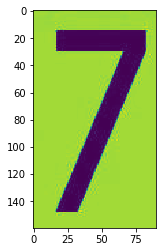

In [11]:
plt.imshow(valImages[0])

In [12]:
len(testImages)

11660

In [13]:
type(testImages)

numpy.ndarray

In [14]:
trainImages_resized = list()
testImages_resized = list()
valImages_resized = list()

In [15]:
ppp = trainImages[0]


In [16]:
from skimage import data
from skimage.transform import resize
p=resize(ppp, (28,28))

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


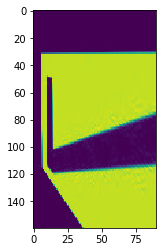

In [17]:
plt.imshow(trainImages[1])

In [18]:
plt.imshow(trainImages_resized[1])

IndexError: list index out of range

In [19]:
from skimage import data
from skimage.transform import resize
for i in range(0,len(trainImages)):
   
    ig=resize(trainImages[i],(28,28))
    trainImages_resized.append(ig)



/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [20]:
for i in range(0,len(testImages)):
    
    it=resize(testImages[i],(28,28))
    testImages_resized.append(it)

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [21]:
for i in range(0,len(valImages)):
    
    iv=resize(valImages[i],(28,28))
    valImages_resized.append(iv)

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [22]:
# trainImages_resized = np.resize(np.array(trainImages),(len(trainImages),HEIGHT,WIDTH))
# testImages_resized =  np.resize(np.array(testImages),(len(testImages),HEIGHT,WIDTH))
# valImages_resized = np.resize(np.array(valImages),(len(valImages),HEIGHT,WIDTH))

In [23]:
valImages_resized[0].shape

(28, 28)

In [24]:
train_flat_images = np.reshape(trainImages_resized,(len(trainImages_resized),HEIGHT*WIDTH))
test_flat_images = np.reshape(testImages_resized,(len(testImages_resized),HEIGHT*WIDTH))
val_flat_images = np.reshape(valImages_resized,(len(valImages_resized),HEIGHT*WIDTH))

In [25]:
print('train images shape:\t\t{}'.format(train_flat_images.shape))

print('test images shape:\t\t{}'.format(test_flat_images.shape))

print('val images shape:\t\t{}'.format(val_flat_images.shape))

train images shape:		(11660, 784)
test images shape:		(11660, 784)
val images shape:		(11660, 784)


In [26]:
validationLabels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [27]:
batch_size = 100
n_batch = len(trainLabels)//batch_size
lr = tf.Variable(1e-4,dtype = tf.float32)

In [28]:
def variable_summaries(var):
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean',mean) # 平均值
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var-mean)))
        tf.summary.scalar('stddev',stddev)
        tf.summary.scalar('max',tf.reduce_max(var))
        tf.summary.scalar('min',tf.reduce_min(var))
        tf.summary.histogram('histgram',var) # 直方图

In [29]:
##初始化权值
def weight_variable(shape,name):
    initial= tf.truncated_normal(shape,stddev=0.1) #生成一个阶段的正太分布
    return tf.Variable(initial,name=name)

## 初始化偏置
def bias_variable(shape,name):
    initial = tf.constant(0.1,shape=shape)
    return tf.Variable(initial,name=name)

## 卷积层
def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')

## 池化层
def max_pool_2x2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')


In [30]:
with tf.name_scope('input'):
    x = tf.placeholder(tf.float32,[None,WIDTH*HEIGHT],name='x-input')
    y = tf.placeholder(tf.float32,[None,Number_Of_Classes],name='y-input')
    with tf.name_scope('x_image'):
        x_image = tf.reshape(x,[-1,28,28,1],name='x_image')


with tf.name_scope('Conv1'):
    with tf.name_scope('W_conv1'):
        W_conv1 = weight_variable([5,5,1,32],name='W_conv1')
    with tf.name_scope('b_conv1'):
        b_conv1 = bias_variable([32],name='b_conv1')
    with tf.name_scope('conv2d_1'):
        conv2d_1 =conv2d(x_image,W_conv1)+b_conv1
    with tf.name_scope('h_conv1'):
        h_conv1 = tf.nn.relu(conv2d_1)
    with tf.name_scope('h_pool1'):
        h_pool1 = max_pool_2x2(h_conv1) 


with tf.name_scope('Conv2'):
    with tf.name_scope('W_conv2'):
        W_conv2 = weight_variable([5,5,32,64],name='W_conv2') 
    with tf.name_scope('b_conv2'):
        b_conv2 = bias_variable([64],name='b_conv2') 
    with tf.name_scope('conv2d_2'):
        conv2d_2 =conv2d(h_pool1,W_conv2)+b_conv2
    with tf.name_scope('h_conv2'):
        h_conv2 = tf.nn.relu(conv2d_2)
    with tf.name_scope('h_pool2'):
        h_pool2 = max_pool_2x2(h_conv2) 
        
        
## 28x28 的图片第一次 卷积 后还是28x28,第一次池化后变成 14x14
## 第二次 卷积后 为 14x14,第二次池化后 成了7x7
# 通过上面操作后得到 64张7x7的平面

with tf.name_scope('fc1'):
    with tf.name_scope('W_fc1'):
        W_fc1 = weight_variable([7*7*64,1024],name='W_fc1') 
    with tf.name_scope('b_fc1'):
        b_fc1 = bias_variable([1024],name='b_fc1')
    with tf.name_scope('h_pool2_flat'):
        h_pool2_flat = tf.reshape(h_pool2,[-1,7*7*64])
    with tf.name_scope('wx_plus_b1'):
        wx_plus_b1 = tf.matmul(h_pool2_flat,W_fc1)+b_fc1
    with tf.name_scope('relu'):
        h_fc1 = tf.nn.relu(wx_plus_b1)

    with tf.name_scope('keep_prob'):
        keep_prob = tf.placeholder(tf.float32,name='keep_prob')
    with tf.name_scope('h_fc1_drop'):
        h_fc1_drop = tf.nn.dropout(h_fc1,keep_prob,name='h_fc1_drop')


with tf.name_scope('fc2'):
    with tf.name_scope('W_fc2'):
        W_fc2 = weight_variable([1024,10],name='W_fc2')
    with tf.name_scope('b_fc2'):
        b_fc2 = bias_variable([10],name='b_fc2')
    with tf.name_scope('wx_plus_b2'):
        wx_plus_b2 = tf.matmul(h_fc1_drop,W_fc2)+b_fc2
    with tf.name_scope('softmax'):
        prediction = tf.nn.softmax(wx_plus_b2)


## 交叉熵代价函数
with tf.name_scope('cross_entropy'):
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=prediction))
    tf.summary.scalar('cross_entropy',cross_entropy)
with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

with tf.name_scope('accuray'):
    with tf.name_scope('correct_prediction'):
        correct_prediction = tf.equal(tf.argmax(prediction,1),tf.argmax(y,1)) ## argmax返回一维张量中最大的值所在的位置
    with tf.name_scope('accuracy'):
        accuracy= tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
        tf.summary.scalar('accuracy',accuracy)

merged = tf.summary.merge_all()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [31]:
mnist.test.images[0].shape

(784,)

In [33]:
test_flat_images[3].shape

(784,)

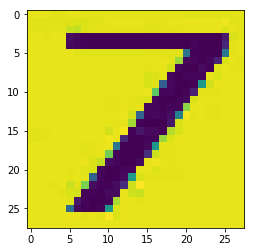

In [37]:
plt.imshow(testImages_resized[0])

In [36]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    #路径和文件名
    #write = tf.summary.FileWriter('logs/fourLayerFullyConnectedTargaDropout',sess.graph)
    train_writer = tf.summary.FileWriter('logs/targatwentyeight/train',sess.graph)
    test_writer = tf.summary.FileWriter('logs/targatwentyeight/test',sess.graph)
    mnist_writer = tf.summary.FileWriter('logs/targatwentyeight/mnist',sess.graph)
    for epoch in range(1000):#把所有的图片训练20次
        #一批一批的迭代图片，一次迭代100张，一共运行n_batch次
        for batch in range(n_batch):
            #每次传入一百张图片
            batch_xs,batch_ys = next_batch(batch_size,train_flat_images,trainLabels)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys,keep_prob:0.6})
        summary = sess.run(merged,feed_dict={x:batch_xs,y:batch_ys,keep_prob:1.0})           
        train_writer.add_summary(summary,epoch)
            
        test_batch_xs,test_batch_ys = next_batch(batch_size,test_flat_images,testLabels)
        summary = sess.run(merged,feed_dict={x:test_batch_xs,y:test_batch_ys,keep_prob:1.0})
        test_writer.add_summary(summary,epoch)  
                                         
        mnist_batch_xs,mnist_batch_ys = mnist.train.next_batch(n_batch)
        summary = sess.run(merged,feed_dict={x:mnist_batch_xs,y:mnist_batch_ys,keep_prob:1.0})
        mnist_writer.add_summary(summary,epoch)
                                         
        acc = sess.run(accuracy,feed_dict={x:test_flat_images,y:testLabels,keep_prob:1.0})
        train_acc = sess.run(accuracy,feed_dict={x:train_flat_images,y:trainLabels,keep_prob:1.0})
        mnist_acc = sess.run(accuracy,feed_dict={x:mnist.test.images*255.0,y:mnist.test.labels,keep_prob:1.0})
        print('epoch=' + str(epoch) + ',test accuracy=' + str(acc)+',train accuracy='+ str(train_acc)+',mnist acc='+str(mnist_acc))

epoch=0,test accuracy=0.34193826,train accuracy=0.34262437,mnist acc=0.136
epoch=1,test accuracy=0.5203259,train accuracy=0.5272727,mnist acc=0.1067
epoch=2,test accuracy=0.5925386,train accuracy=0.60102916,mnist acc=0.1631
epoch=3,test accuracy=0.6231561,train accuracy=0.62975985,mnist acc=0.1594
epoch=4,test accuracy=0.6277015,train accuracy=0.64536875,mnist acc=0.1528
epoch=5,test accuracy=0.64854205,train accuracy=0.66646653,mnist acc=0.1366
epoch=6,test accuracy=0.656518,train accuracy=0.68121785,mnist acc=0.136
epoch=7,test accuracy=0.731904,train accuracy=0.757976,mnist acc=0.1689
epoch=8,test accuracy=0.745283,train accuracy=0.76981133,mnist acc=0.1854
epoch=9,test accuracy=0.74802744,train accuracy=0.773928,mnist acc=0.1389
epoch=10,test accuracy=0.761578,train accuracy=0.7948542,mnist acc=0.155
epoch=11,test accuracy=0.76106346,train accuracy=0.798542,mnist acc=0.1604
epoch=12,test accuracy=0.766295,train accuracy=0.80531734,mnist acc=0.1522
epoch=13,test accuracy=0.76903945,

epoch=109,test accuracy=0.8218696,train accuracy=0.9179245,mnist acc=0.1544
epoch=110,test accuracy=0.82384217,train accuracy=0.919211,mnist acc=0.1242
epoch=111,test accuracy=0.8236707,train accuracy=0.9182676,mnist acc=0.147
epoch=112,test accuracy=0.82272726,train accuracy=0.91861063,mnist acc=0.1387
epoch=113,test accuracy=0.82204115,train accuracy=0.9180103,mnist acc=0.1227
epoch=114,test accuracy=0.82392794,train accuracy=0.9186964,mnist acc=0.1252
epoch=115,test accuracy=0.82418525,train accuracy=0.91886795,mnist acc=0.1274
epoch=116,test accuracy=0.8259005,train accuracy=0.91955405,mnist acc=0.1331
epoch=117,test accuracy=0.8254717,train accuracy=0.9190394,mnist acc=0.1327
epoch=118,test accuracy=0.8233276,train accuracy=0.921012,mnist acc=0.1277
epoch=119,test accuracy=0.8229846,train accuracy=0.9203259,mnist acc=0.1294
epoch=120,test accuracy=0.8243568,train accuracy=0.92024016,mnist acc=0.1236
epoch=121,test accuracy=0.8240137,train accuracy=0.9204974,mnist acc=0.128
epoch=1

epoch=217,test accuracy=0.8266724,train accuracy=0.92984563,mnist acc=0.1354
epoch=218,test accuracy=0.82598627,train accuracy=0.9302744,mnist acc=0.1429
epoch=219,test accuracy=0.8268439,train accuracy=0.9300172,mnist acc=0.1446
epoch=220,test accuracy=0.82632935,train accuracy=0.93018866,mnist acc=0.1535
epoch=221,test accuracy=0.8245283,train accuracy=0.9299314,mnist acc=0.1509
epoch=222,test accuracy=0.82349914,train accuracy=0.9303602,mnist acc=0.1496
epoch=223,test accuracy=0.82461405,train accuracy=0.9302744,mnist acc=0.1482
epoch=224,test accuracy=0.82632935,train accuracy=0.93018866,mnist acc=0.1442
epoch=225,test accuracy=0.8264151,train accuracy=0.9300172,mnist acc=0.1564
epoch=226,test accuracy=0.82564324,train accuracy=0.9295883,mnist acc=0.1479
epoch=227,test accuracy=0.8247856,train accuracy=0.93010294,mnist acc=0.1496
epoch=228,test accuracy=0.82461405,train accuracy=0.9302744,mnist acc=0.162
epoch=229,test accuracy=0.82650083,train accuracy=0.93053174,mnist acc=0.1518


epoch=325,test accuracy=0.82650083,train accuracy=0.9336192,mnist acc=0.1523
epoch=326,test accuracy=0.82770157,train accuracy=0.9345626,mnist acc=0.1602
epoch=327,test accuracy=0.8261578,train accuracy=0.9347341,mnist acc=0.1523
epoch=328,test accuracy=0.82718694,train accuracy=0.9343911,mnist acc=0.146
epoch=329,test accuracy=0.8266724,train accuracy=0.93447685,mnist acc=0.15
epoch=330,test accuracy=0.8272727,train accuracy=0.9348199,mnist acc=0.1137
epoch=331,test accuracy=0.82632935,train accuracy=0.9346484,mnist acc=0.1391
epoch=332,test accuracy=0.8258147,train accuracy=0.9343053,mnist acc=0.1356
epoch=333,test accuracy=0.825729,train accuracy=0.93413377,mnist acc=0.1334
epoch=334,test accuracy=0.82744426,train accuracy=0.9348199,mnist acc=0.1373
epoch=335,test accuracy=0.8229846,train accuracy=0.93353343,mnist acc=0.1497
epoch=336,test accuracy=0.82632935,train accuracy=0.93516296,mnist acc=0.1276
epoch=337,test accuracy=0.8283019,train accuracy=0.9345626,mnist acc=0.1315
epoch=

epoch=433,test accuracy=0.8283019,train accuracy=0.9372213,mnist acc=0.1319
epoch=434,test accuracy=0.8284734,train accuracy=0.9373928,mnist acc=0.1228
epoch=435,test accuracy=0.82632935,train accuracy=0.93730706,mnist acc=0.1283
epoch=436,test accuracy=0.8264151,train accuracy=0.9372213,mnist acc=0.1325
epoch=437,test accuracy=0.8271012,train accuracy=0.93730706,mnist acc=0.1503
epoch=438,test accuracy=0.82650083,train accuracy=0.9373928,mnist acc=0.1489
epoch=439,test accuracy=0.8276158,train accuracy=0.93704975,mnist acc=0.1339
epoch=440,test accuracy=0.82718694,train accuracy=0.93730706,mnist acc=0.136
epoch=441,test accuracy=0.82770157,train accuracy=0.93747854,mnist acc=0.1571
epoch=442,test accuracy=0.8276158,train accuracy=0.93704975,mnist acc=0.1512
epoch=443,test accuracy=0.8284734,train accuracy=0.9373928,mnist acc=0.1342
epoch=444,test accuracy=0.82718694,train accuracy=0.9375643,mnist acc=0.1513
epoch=445,test accuracy=0.8283019,train accuracy=0.93773586,mnist acc=0.1479
e

epoch=542,test accuracy=0.8298456,train accuracy=0.9393653,mnist acc=0.1595
epoch=543,test accuracy=0.82958835,train accuracy=0.93893653,mnist acc=0.15
epoch=544,test accuracy=0.8291595,train accuracy=0.9390223,mnist acc=0.1557
epoch=545,test accuracy=0.828988,train accuracy=0.9392796,mnist acc=0.1381
epoch=546,test accuracy=0.8265866,train accuracy=0.93962264,mnist acc=0.149
epoch=547,test accuracy=0.82933104,train accuracy=0.9397084,mnist acc=0.1442
epoch=548,test accuracy=0.8284734,train accuracy=0.93962264,mnist acc=0.1406
epoch=549,test accuracy=0.82787305,train accuracy=0.9394511,mnist acc=0.145
epoch=550,test accuracy=0.8284734,train accuracy=0.93962264,mnist acc=0.148
epoch=551,test accuracy=0.82753,train accuracy=0.9394511,mnist acc=0.1459
epoch=552,test accuracy=0.8268439,train accuracy=0.93919384,mnist acc=0.1419
epoch=553,test accuracy=0.82770157,train accuracy=0.9397084,mnist acc=0.1388
epoch=554,test accuracy=0.82787305,train accuracy=0.9390223,mnist acc=0.1475
epoch=555,

epoch=650,test accuracy=0.8271012,train accuracy=0.9408233,mnist acc=0.147
epoch=651,test accuracy=0.82632935,train accuracy=0.94056606,mnist acc=0.1518
epoch=652,test accuracy=0.8254717,train accuracy=0.94099486,mnist acc=0.1462
epoch=653,test accuracy=0.82855916,train accuracy=0.94099486,mnist acc=0.1314
epoch=654,test accuracy=0.82770157,train accuracy=0.9406518,mnist acc=0.146
epoch=655,test accuracy=0.8280446,train accuracy=0.9406518,mnist acc=0.1291
epoch=656,test accuracy=0.8279588,train accuracy=0.94073755,mnist acc=0.1349
epoch=657,test accuracy=0.8283877,train accuracy=0.9409091,mnist acc=0.1344
epoch=658,test accuracy=0.8273585,train accuracy=0.94056606,mnist acc=0.1301
epoch=659,test accuracy=0.82787305,train accuracy=0.94108063,mnist acc=0.1316
epoch=660,test accuracy=0.8271012,train accuracy=0.9404803,mnist acc=0.1261
epoch=661,test accuracy=0.8266724,train accuracy=0.9408233,mnist acc=0.1134
epoch=662,test accuracy=0.8290737,train accuracy=0.94073755,mnist acc=0.1254
epo

epoch=759,test accuracy=0.82753,train accuracy=0.9423671,mnist acc=0.1537
epoch=760,test accuracy=0.8240137,train accuracy=0.9425386,mnist acc=0.1448
epoch=761,test accuracy=0.82787305,train accuracy=0.94245285,mnist acc=0.1536
epoch=762,test accuracy=0.82564324,train accuracy=0.9423671,mnist acc=0.136
epoch=763,test accuracy=0.82701546,train accuracy=0.9422813,mnist acc=0.1538
epoch=764,test accuracy=0.8280446,train accuracy=0.94219553,mnist acc=0.1532
epoch=765,test accuracy=0.8271012,train accuracy=0.9423671,mnist acc=0.151
epoch=766,test accuracy=0.82461405,train accuracy=0.9427101,mnist acc=0.1557
epoch=767,test accuracy=0.8253859,train accuracy=0.94168097,mnist acc=0.1431
epoch=768,test accuracy=0.825729,train accuracy=0.94219553,mnist acc=0.1392
epoch=769,test accuracy=0.8253859,train accuracy=0.94176674,mnist acc=0.1463
epoch=770,test accuracy=0.82598627,train accuracy=0.9422813,mnist acc=0.1618
epoch=771,test accuracy=0.82598627,train accuracy=0.9419382,mnist acc=0.1585
epoch=

KeyboardInterrupt: 

In [ ]:
epoch=0test accuracy=0.109005146train accuracy=0.11029159mnist acc=0.1127
epoch=1test accuracy=0.10866209train accuracy=0.109691255mnist acc=0.0989
epoch=2test accuracy=0.10523156train accuracy=0.107632935mnist acc=0.1116
epoch=3test accuracy=0.10711835train accuracy=0.1109777mnist acc=0.1154
epoch=4test accuracy=0.108490564train accuracy=0.11209262mnist acc=0.1222
epoch=5test accuracy=0.10831904train accuracy=0.114922814mnist acc=0.1124
epoch=6test accuracy=0.107375644train accuracy=0.11295026mnist acc=0.1239
epoch=7test accuracy=0.11886793train accuracy=0.11912522mnist acc=0.0982
epoch=8test accuracy=0.12718697train accuracy=0.14734134mnist acc=0.0994
epoch=9test accuracy=0.13113208train accuracy=0.15574615mnist acc=0.0986
epoch=10test accuracy=0.12538594train accuracy=0.15986277mnist acc=0.1005
epoch=11test accuracy=0.12598628train accuracy=0.1712693mnist acc=0.1454
epoch=12test accuracy=0.13893653train accuracy=0.17161235mnist acc=0.1098
epoch=13test accuracy=0.13885078train accuracy=0.18610634mnist acc=0.1204
epoch=14test accuracy=0.14150943train accuracy=0.20008576mnist acc=0.1688
epoch=15test accuracy=0.1371355train accuracy=0.19854203mnist acc=0.1339
epoch=16test accuracy=0.14476843train accuracy=0.21861063mnist acc=0.1439
epoch=17test accuracy=0.14759862train accuracy=0.2170669mnist acc=0.1684
epoch=18test accuracy=0.1397084train accuracy=0.22058319mnist acc=0.1582
epoch=19test accuracy=0.14828473train accuracy=0.23790738mnist acc=0.1553
epoch=20test accuracy=0.14622642train accuracy=0.24751286mnist acc=0.1599
epoch=21test accuracy=0.15025729train accuracy=0.25548884mnist acc=0.1444
epoch=22test accuracy=0.15463121train accuracy=0.2596055mnist acc=0.1661
epoch=23test accuracy=0.15325901train accuracy=0.26423672mnist acc=0.1505
epoch=24test accuracy=0.14854202train accuracy=0.26835334mnist acc=0.1283
epoch=25test accuracy=0.15463121train accuracy=0.2686964mnist acc=0.1489
epoch=26test accuracy=0.14862779train accuracy=0.2686964mnist acc=0.1645
epoch=27test accuracy=0.16046312train accuracy=0.28310463mnist acc=0.1325
epoch=28test accuracy=0.15720412train accuracy=0.28138936mnist acc=0.1518
epoch=29test accuracy=0.15120068train accuracy=0.2904803mnist acc=0.1434
epoch=30test accuracy=0.15789023train accuracy=0.29468268mnist acc=0.1514
epoch=31test accuracy=0.1558319train accuracy=0.29734135mnist acc=0.1429
epoch=32test accuracy=0.15900515train accuracy=0.2976844mnist acc=0.1513
epoch=33test accuracy=0.16303602train accuracy=0.31132075mnist acc=0.1406
epoch=34test accuracy=0.16492282train accuracy=0.31106347mnist acc=0.162
epoch=35test accuracy=0.16286449train accuracy=0.31132075mnist acc=0.13
epoch=36test accuracy=0.16012007train accuracy=0.31483704mnist acc=0.1282
epoch=37test accuracy=0.16072041train accuracy=0.3216981mnist acc=0.1389
epoch=38test accuracy=0.16397941train accuracy=0.32281303mnist acc=0.1413
epoch=39test accuracy=0.15831904train accuracy=0.3215266mnist acc=0.1398
epoch=40test accuracy=0.15634649train accuracy=0.32495713mnist acc=0.145
epoch=41test accuracy=0.16303602train accuracy=0.32512864mnist acc=0.1377
epoch=42test accuracy=0.16586621train accuracy=0.3378216mnist acc=0.1441
epoch=43test accuracy=0.16878216train accuracy=0.3410806mnist acc=0.1337
epoch=44test accuracy=0.17169811train accuracy=0.34262437mnist acc=0.1459
epoch=45test accuracy=0.17169811train accuracy=0.34631217mnist acc=0.1397
epoch=46test accuracy=0.16663808train accuracy=0.34699827mnist acc=0.134
epoch=47test accuracy=0.17495711train accuracy=0.35180104mnist acc=0.1297
epoch=48test accuracy=0.1693825train accuracy=0.35694683mnist acc=0.1332
epoch=49test accuracy=0.17204116train accuracy=0.36003432mnist acc=0.1425
epoch=50test accuracy=0.16397941train accuracy=0.36166382mnist acc=0.1327
epoch=51test accuracy=0.17512864train accuracy=0.37041166mnist acc=0.1432
epoch=52test accuracy=0.18078902train accuracy=0.37538594mnist acc=0.1515
epoch=53test accuracy=0.17255574train accuracy=0.3761578mnist acc=0.1494
epoch=54test accuracy=0.17915952train accuracy=0.37838766mnist acc=0.1386
epoch=55test accuracy=0.18070325train accuracy=0.37864494mnist acc=0.1545
epoch=56test accuracy=0.17204116train accuracy=0.38001716mnist acc=0.1582
epoch=57test accuracy=0.17761578train accuracy=0.38464838mnist acc=0.1586
epoch=58test accuracy=0.1754717train accuracy=0.3885935mnist acc=0.155
epoch=59test accuracy=0.17684391train accuracy=0.38885078mnist acc=0.1443
epoch=60test accuracy=0.18353345train accuracy=0.39519724mnist acc=0.1502
epoch=61test accuracy=0.17864494train accuracy=0.39751285mnist acc=0.1526
epoch=62test accuracy=0.18173242train accuracy=0.40051457mnist acc=0.1539
epoch=63test accuracy=0.17855918train accuracy=0.4004288mnist acc=0.1516
epoch=64test accuracy=0.18533447train accuracy=0.40660378mnist acc=0.143
epoch=65test accuracy=0.17675814train accuracy=0.41037735mnist acc=0.1486
epoch=66test accuracy=0.182247train accuracy=0.40926245mnist acc=0.1359
epoch=67test accuracy=0.17821613train accuracy=0.41432247mnist acc=0.1481
epoch=68test accuracy=0.18207547train accuracy=0.41526586mnist acc=0.1421
epoch=69test accuracy=0.18447684train accuracy=0.41878217mnist acc=0.1422
epoch=70test accuracy=0.17838766train accuracy=0.4142367mnist acc=0.14
epoch=71test accuracy=0.17692967train accuracy=0.4156089mnist acc=0.1308
epoch=72test accuracy=0.17813036train accuracy=0.42538592mnist acc=0.1338
epoch=73test accuracy=0.18722127train accuracy=0.42624357mnist acc=0.1323
epoch=74test accuracy=0.18198971train accuracy=0.42933103mnist acc=0.1323
epoch=75test accuracy=0.17975986train accuracy=0.4283019mnist acc=0.1321
epoch=76test accuracy=0.18756433train accuracy=0.4326758mnist acc=0.1263
epoch=77test accuracy=0.18113208train accuracy=0.42890224mnist acc=0.1229
epoch=78test accuracy=0.18036021train accuracy=0.4352487mnist acc=0.1379
epoch=79test accuracy=0.17993139train accuracy=0.42255574mnist acc=0.143
epoch=80test accuracy=0.18662092train accuracy=0.43816465mnist acc=0.1303
epoch=81test accuracy=0.18542024train accuracy=0.44030875mnist acc=0.133
epoch=82test accuracy=0.18370497train accuracy=0.43370497mnist acc=0.1367
epoch=83test accuracy=0.18953688train accuracy=0.44433963mnist acc=0.1257
epoch=84test accuracy=0.18096055train accuracy=0.43953687mnist acc=0.1319
epoch=85test accuracy=0.18233275train accuracy=0.44168097mnist acc=0.134
epoch=86test accuracy=0.17692967train accuracy=0.44365352mnist acc=0.1329
epoch=87test accuracy=0.18404803train accuracy=0.4453688mnist acc=0.1239
epoch=88test accuracy=0.18353345train accuracy=0.44819897mnist acc=0.1269
epoch=89test accuracy=0.1780446train accuracy=0.4439108mnist acc=0.1324
epoch=90test accuracy=0.18910806train accuracy=0.4512007mnist acc=0.1299
epoch=91test accuracy=0.185506train accuracy=0.45265865mnist acc=0.1244
epoch=92test accuracy=0.18730703train accuracy=0.4512007mnist acc=0.1312
epoch=93test accuracy=0.18078902train accuracy=0.4521441mnist acc=0.1276
epoch=94test accuracy=0.18396227train accuracy=0.45574614mnist acc=0.1312
epoch=95test accuracy=0.18610634train accuracy=0.45085764mnist acc=0.1332
epoch=96test accuracy=0.18113208train accuracy=0.4542024mnist acc=0.1345
epoch=97test accuracy=0.18464836train accuracy=0.45814753mnist acc=0.1262
epoch=98test accuracy=0.19013722train accuracy=0.46063465mnist acc=0.1232
epoch=99test accuracy=0.18353345train accuracy=0.45909092mnist acc=0.1276
epoch=100test accuracy=0.18619211train accuracy=0.4616638mnist acc=0.1208
epoch=101test accuracy=0.18327616train accuracy=0.46277872mnist acc=0.1295
epoch=102test accuracy=0.18945111train accuracy=0.461235mnist acc=0.1285
epoch=103test accuracy=0.18584906train accuracy=0.4651801mnist acc=0.1255
epoch=104test accuracy=0.18979417train accuracy=0.46595198mnist acc=0.1151
epoch=105test accuracy=0.17950258train accuracy=0.46440822mnist acc=0.1279
epoch=106test accuracy=0.1880789train accuracy=0.4651801mnist acc=0.1145
epoch=107test accuracy=0.18782161train accuracy=0.47049743mnist acc=0.1272
epoch=108test accuracy=0.18207547train accuracy=0.4689537mnist acc=0.1208
epoch=109test accuracy=0.18516295train accuracy=0.46715266mnist acc=0.1245
epoch=110test accuracy=0.19030875train accuracy=0.46946827mnist acc=0.1245
epoch=111test accuracy=0.18704975train accuracy=0.4715266mnist acc=0.1319
epoch=112test accuracy=0.18267581train accuracy=0.46578044mnist acc=0.1265
epoch=113test accuracy=0.18867925train accuracy=0.47487137mnist acc=0.1271
epoch=114test accuracy=0.18396227train accuracy=0.48284733mnist acc=0.1218
epoch=115test accuracy=0.18722127train accuracy=0.48010293mnist acc=0.1204
epoch=116test accuracy=0.18730703train accuracy=0.48739278mnist acc=0.1254
epoch=117test accuracy=0.19459692train accuracy=0.49176672mnist acc=0.1189
epoch=118test accuracy=0.18962264train accuracy=0.49614066mnist acc=0.1136
epoch=119test accuracy=0.18593483train accuracy=0.49468267mnist acc=0.1116
epoch=120test accuracy=0.18679245train accuracy=0.501801mnist acc=0.1134
epoch=121test accuracy=0.18439108train accuracy=0.49862778mnist acc=0.1171
epoch=122test accuracy=0.18979417train accuracy=0.5076329mnist acc=0.1064
epoch=123test accuracy=0.18524872train accuracy=0.5058319mnist acc=0.1174
epoch=124test accuracy=0.19408233train accuracy=0.5093482mnist acc=0.1157
epoch=125test accuracy=0.19099486train accuracy=0.5142367mnist acc=0.1043
epoch=126test accuracy=0.1922813train accuracy=0.5181818mnist acc=0.0953
epoch=127test accuracy=0.18987992train accuracy=0.5142367mnist acc=0.1049
epoch=128test accuracy=0.19554031train accuracy=0.5207547mnist acc=0.1017
epoch=129test accuracy=0.19262436train accuracy=0.5188679mnist acc=0.113
epoch=130test accuracy=0.19416809train accuracy=0.517753mnist acc=0.1057
epoch=131test accuracy=0.19150944train accuracy=0.5232419mnist acc=0.1073
epoch=132test accuracy=0.18842195train accuracy=0.522813mnist acc=0.1008
epoch=133test accuracy=0.18970841train accuracy=0.5228988mnist acc=0.1016
epoch=134test accuracy=0.18490566train accuracy=0.5212693mnist acc=0.1103
epoch=135test accuracy=0.1915952train accuracy=0.5272727mnist acc=0.1123
epoch=136test accuracy=0.19073756train accuracy=0.5268439mnist acc=0.1042
epoch=137test accuracy=0.18979417train accuracy=0.5280446mnist acc=0.1017
epoch=138test accuracy=0.19897084train accuracy=0.53138936mnist acc=0.1176
epoch=139test accuracy=0.18850772train accuracy=0.5282161mnist acc=0.1026
epoch=140test accuracy=0.1951115train accuracy=0.52915955mnist acc=0.1132
epoch=141test accuracy=0.1997427train accuracy=0.5350772mnist acc=0.1078
epoch=142test accuracy=0.18867925train accuracy=0.532247mnist acc=0.1051
epoch=143test accuracy=0.19631217train accuracy=0.53379077mnist acc=0.1172
epoch=144test accuracy=0.19459692train accuracy=0.5327616mnist acc=0.1099
epoch=145test accuracy=0.19614065train accuracy=0.5364494mnist acc=0.1066
epoch=146test accuracy=0.19759862train accuracy=0.5368782mnist acc=0.1094
epoch=147test accuracy=0.19777015train accuracy=0.5395369mnist acc=0.1064
epoch=148test accuracy=0.19922814train accuracy=0.53747857mnist acc=0.1139
epoch=149test accuracy=0.18276158train accuracy=0.5319897mnist acc=0.103
epoch=150test accuracy=0.19399656train accuracy=0.53653514mnist acc=0.1103